<a href="https://colab.research.google.com/github/jagadeeswar2/data-analyst-task-1/blob/main/Netflix_Data_Cleaning_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime


In [2]:

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('netflix_titles.csv')
df.head()


Saving netflix_titles.csv to netflix_titles (1).csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:

print("Missing values:\n", df.isnull().sum())


df.drop_duplicates(inplace=True)


df.columns = df.columns.str.lower().str.replace(' ', '_')


df['country'] = df['country'].astype(str).str.strip().str.lower()
df['director'] = df['director'].astype(str).str.title()
df['cast'] = df['cast'].astype(str).str.title()
df['rating'] = df['rating'].astype(str).str.upper()

df.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'unknown', 'rating': 'UNRATED'}, inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df[['duration_value', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_value'] = pd.to_numeric(df['duration_value'], errors='coerce')

df['duration_unit'] = df['duration_unit'].fillna('Unknown').str.lower()

print("✅ Data cleaned successfully.")
df.head()


Missing values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
✅ Data cleaned successfully.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Nan,united states,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,min
1,s2,TV Show,Blood & Water,Nan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0,seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",nan,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1.0,season
3,s4,TV Show,Jailbirds New Orleans,Nan,Nan,nan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1.0,season
4,s5,TV Show,Kota Factory,Nan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",india,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2.0,seasons


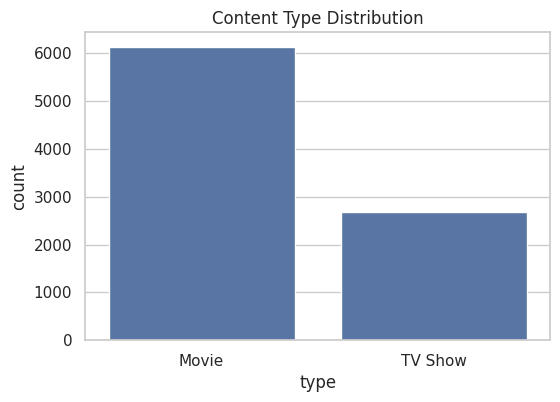

<ipython-input-4-5c8f73ec518f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


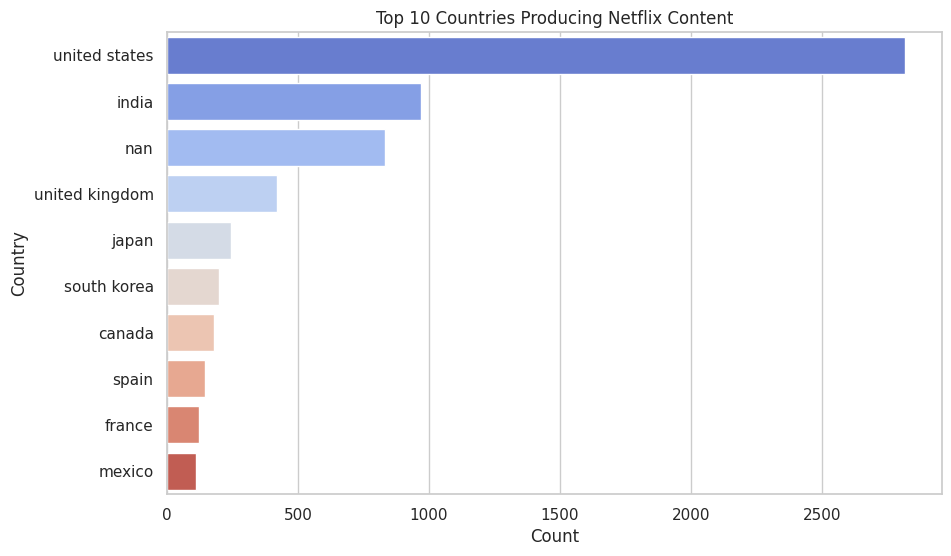

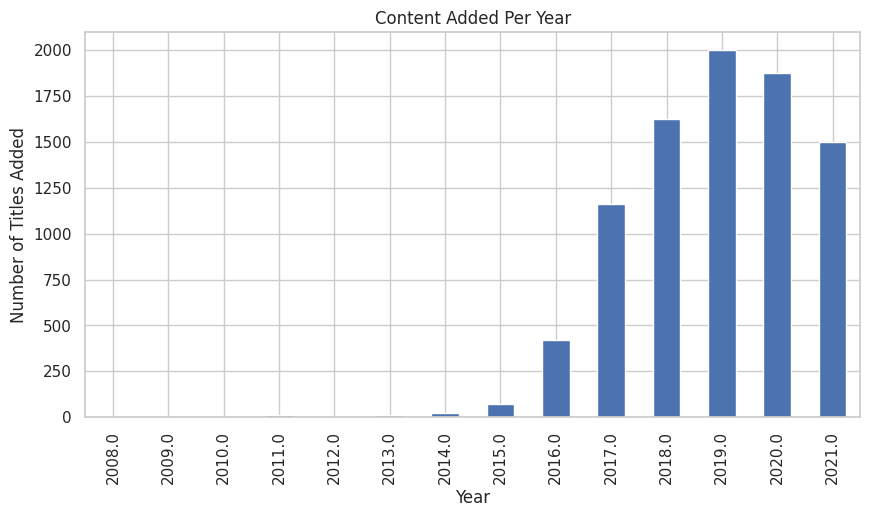

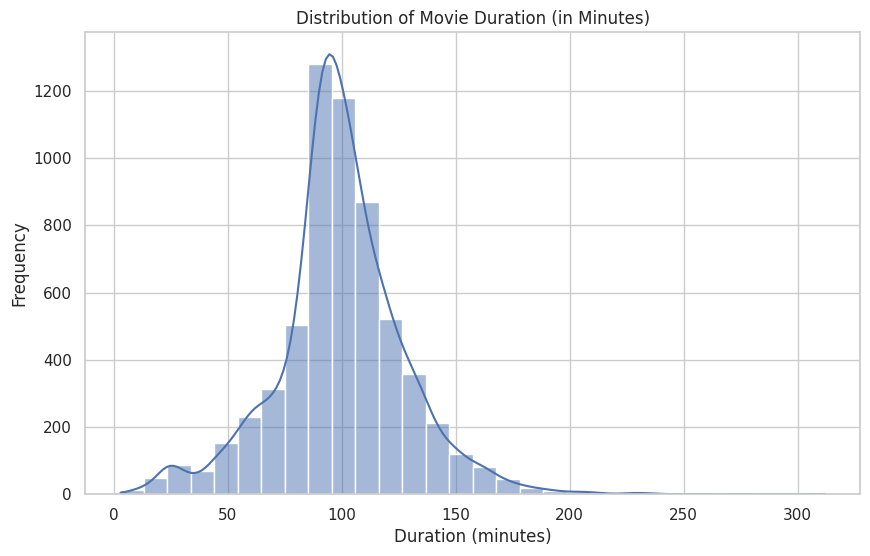

In [4]:

sns.set(style='whitegrid')

plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title('Content Type Distribution')
plt.show()

plt.figure(figsize=(10,6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Content Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

movie_df = df[df['type'] == 'Movie']
plt.figure(figsize=(10,6))
sns.histplot(movie_df['duration_value'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Duration (in Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


In [11]:

df.to_csv("netflix_cleaned.csv", index=False)

from google.colab import files
files.download("netflix_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>